# Topic Modelling & Sentiment Analysis 
## Data Science Subreddit

This notebook presents step-by-step processes in topic modelling and sentiment analysis:

1. EDA
2. Data Preprocessing
3. Sentiment Analysis
4. Topic Modelling using LDA

## 1. EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_top_posts = pd.read_json('reddit_data.json')


In [3]:
data_top_posts.tail()

,id,datetime,flair,title,score,comment counts,content,comments
989,15v4oys,2023-08-19 03:11:09,Education,Using synthetic data to reduce a form of hallu...,31,9,**Credit: I read about this in** [**this AI ne...,"[Pretty interesting research, because it reall..."
990,15pb4rq,2023-08-12 18:01:32,Career,Data Engineering as fallback once the LLM hype...,31,21,I am facing quite a lot of anxiety about the D...,[DE is pretty tool heavy. I’d recommend starti...
991,15acrw9,2023-07-26 17:55:32,Education,Data Analyst Bootcamp,31,19,Hello beautiful Reddit community \n\nI would l...,[No for the boot camp. Those are money grabs. ...
992,14v3y0v,2023-07-09 17:12:30,Career,What other jobs would see experience as a Data...,28,19,I have a little more than 4 years of experienc...,"[Off the top of my head: Data Engineer, Softwa..."
993,14sjss2,2023-07-06 19:52:01,Discussion,Leveraging causality in data science? How are ...,30,34,Every few months I like to deep dive on an are...,[I'm mostly looking at the stuff by Athey and ...


In [4]:
data_hot_posts = pd.read_json('reddit_data_hot_posts.json')

In [5]:
data_hot_posts.tail()

,id,datetime,flair,title,score,comment counts,content,comments
158,1bpcc6l,2024-03-27 20:37:57,Challenges,Dumb question but do data scientists make an e...,53,42,Lowly BI person here -- just curious outside o...,"[Yes? I'm kind of confused by the question, on..."
159,1bpjsas,2024-03-28 01:55:11,Education,Best Supplementary Texts for Casella and Berge...,14,6,Making this post to help current and future gr...,"[I've considered Corcoran's book, but I'm on t..."
160,1bpkfvd,2024-03-28 02:26:14,Career Discussion,What title would you describe this position as?,11,19,"I work as a data analyst at a fintech company,...",[All I see as far as a job “function” is you e...
161,1bpe2fn,2024-03-27 21:47:54,Statistics,Causal inference question,25,24,I used DoWhy to create some synthetic data. Th...,[My causal inference is super rusty so I don’t...
162,1bpodhu,2024-03-28 06:03:32,DE,"Data for LLMs, navigating the LLM data pipeline",2,13,"Tons of articles about LLMs, yet when I wanted...",[It was a nice and comprehensive read! Especia...


In [6]:
# Concatenate the two datasets vertically
con_df = pd.concat([data_top_posts, data_hot_posts], ignore_index=True)

# Remove duplicates based on the 'id' column
reddit_df = con_df.drop_duplicates(subset='id')

# Reset index after removing duplicates
reddit_df.reset_index(drop=True, inplace=True)

reddit_df.tail()

,id,datetime,flair,title,score,comment counts,content,comments
1128,1bpnem1,2024-03-28 05:02:36,Career Discussion,Thinking of dipping out of DS for an MBA. Legi...,24,53,Edit: Heads up! I did post recently but I want...,"[Am in DS, I have an MBA as well as Masters in..."
1129,1bpjsas,2024-03-28 01:55:11,Education,Best Supplementary Texts for Casella and Berge...,14,6,Making this post to help current and future gr...,"[I've considered Corcoran's book, but I'm on t..."
1130,1bpkfvd,2024-03-28 02:26:14,Career Discussion,What title would you describe this position as?,11,19,"I work as a data analyst at a fintech company,...",[All I see as far as a job “function” is you e...
1131,1bpe2fn,2024-03-27 21:47:54,Statistics,Causal inference question,25,24,I used DoWhy to create some synthetic data. Th...,[My causal inference is super rusty so I don’t...
1132,1bpodhu,2024-03-28 06:03:32,DE,"Data for LLMs, navigating the LLM data pipeline",2,13,"Tons of articles about LLMs, yet when I wanted...",[It was a nice and comprehensive read! Especia...


In [7]:
#checking data types
reddit_df.dtypes

id                        object
datetime          datetime64[ns]
flair                     object
title                     object
score                      int64
comment counts             int64
content                   object
comments                  object
dtype: object

In [8]:
reddit_df.describe()

,datetime,score,comment counts
count,1133,1133.000000,1133.000000
mean,2023-10-28 17:55:31.058252544,135.462489,69.794351
min,2023-04-05 15:52:41,0.000000,0.000000
25%,2023-07-24 17:21:44,43.000000,28.000000
50%,2023-10-26 04:13:19,79.000000,52.000000
75%,2024-02-10 07:24:42,149.000000,90.000000
max,2024-04-16 13:11:35,1704.000000,643.000000
std,NaN,176.648304,65.420096


In [9]:
reddit_df.isna().sum()

id                0
datetime          0
flair             5
title             0
score             0
comment counts    0
content           0
comments          0
dtype: int64

In [10]:
reddit_df['flair'].unique()

array(['Monday Meme', 'Discussion', 'Career', 'Fun/Trivia',
       'Career Discussion', 'Analysis', 'AI', 'Tooling', 'Challenges',
       'Coding', 'Meta', 'Education', 'Projects', 'ML', 'Tools', None,
       'Statistics', 'Networking', 'DE'], dtype=object)

In [11]:
reddit_df['flair'] = reddit_df['flair'].replace({
    'Career Discussion': 'Career', 
    'Tooling': 'Tools'
})

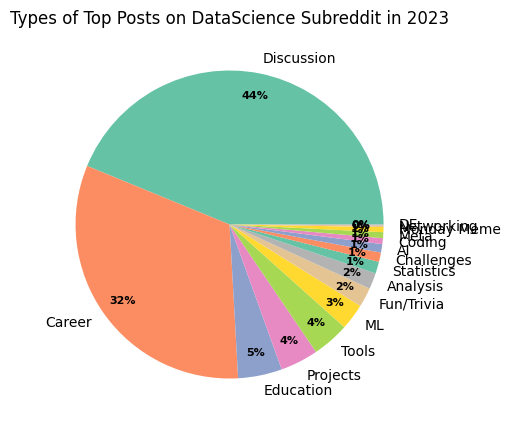

In [12]:
#initial analysis to understand engagement types, flair types before conducting sentiment analysis
#what are the top flairs?
flair_df = (pd.DataFrame(
    reddit_df.value_counts('flair')
    .reset_index()
))
flair_df.columns = ['flairs', 'count']

colors = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
# Function to only show percentage if it's above 5%
def func(pct, allvals):
    return f"{pct:.0f}%"

# Determine explode values: exploding slices less than 5%
#explode = [0.2 if (x/sum(flair_df['count']) * 100) < 1 else 0 for x in flair_df['count']]

# Creating the pie chart with conditional labeling and exploding
wedges, texts, autotexts = ax.pie(flair_df['count'], labels=flair_df['flairs'], autopct=lambda pct: func(pct, flair_df['count']),
                                  textprops={'color': "black"}, colors=colors, pctdistance=0.85, labeldistance=1.1)
                                         
plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Types of Top Posts on DataScience Subreddit in 2023")                                        
plt.show()                                       

In [82]:
#What are the top 10 posts that were trending in 2023?

top_posts = pd.DataFrame(reddit_df.groupby(['flair','title'])
    .agg({'score':'mean'})
    .sort_values(by='score',ascending=False)
    .reset_index())

pd.set_option('display.max_colwidth', None)
top_posts.head(10)

,flair,title,score
0,Monday Meme,Meme Mondays,1704.0
1,Discussion,Friendly reminder not to work too hard. You'll just get fired,1694.0
2,Discussion,Data scientist quits her job at Spotify,1377.0
3,Monday Meme,XKCD Comic does machine learning,1236.0
4,Career,I investigated the Underground Economy of Glassdoor Reviews,1168.0
5,Fun/Trivia,It be like this now,1161.0
6,Monday Meme,What opinion about data science would you defend like this?,1133.0
7,Career,The BS they tell about Data Science…,1047.0
8,Analysis,Linear Regression is underrated,986.0
9,Career,My greatest data science achievement...,904.0


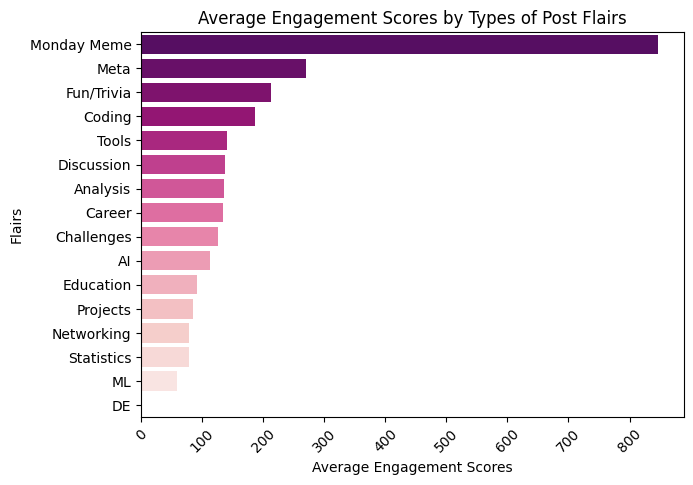

In [85]:
#what are the posts that have average highest engagement?
highest_eng_df = (reddit_df.groupby('flair')
                .agg({'score':'mean'})
                .sort_values(by='score',ascending=False)
                .reset_index())

palette = sns.color_palette("RdPu_r",len(highest_eng_df['flair']))

fig = plt.figure (figsize =(7,5))
sns.barplot(data= highest_eng_df,
           x = 'score',
           y = 'flair',
           palette= palette)

#set labels and titles
plt.xlabel('Average Engagement Scores')
plt.ylabel('Flairs')
plt.title('Average Engagement Scores by Types of Post Flairs')
plt.xticks(rotation = 45)
plt.show()



## 2.Data Processing

In [17]:
reshaped_df= (reddit_df.drop(['score','comment counts'],axis=1)
    .melt(id_vars=['id','datetime','flair']))

In [18]:
#renaming melted column names to be more intuitive
reshaped_df.rename(columns={'variable':'text_type', 'value':'text'},inplace=True)

In [19]:
# Use explode to flatten the DataFrame
final_df = reshaped_df.explode('text')

# Reset index
final_df.reset_index(drop=True, inplace=True)

In [20]:
final_df.tail(5)

,id,datetime,flair,text_type,text
7764,1bpodhu,2024-03-28 06:03:32,DE,comments,"It was a nice and comprehensive read! Especially in this age where most people and companies are using pretrained llms for their workflows, knowing how to build and optimise one using the data helps a lot."
7765,1bpodhu,2024-03-28 06:03:32,DE,comments,Enjoyed the read. Student here. Any reason you didn’t choose Azure Datalake or warehouse in your last section ‘Storing training data’?
7766,1bpodhu,2024-03-28 06:03:32,DE,comments,Good one
7767,1bpodhu,2024-03-28 06:03:32,DE,comments,Nice article! I've noticed this throughout my career in tech that whenever I'm tackling a new focus that requires new skills there are barely any available resources that cohesively describe processes and workflows from the ground up.
7768,1bpodhu,2024-03-28 06:03:32,DE,comments,Me too


In [21]:
final_df.isna().sum()

id            0
datetime      0
flair        35
text_type     0
text          3
dtype: int64

As we will analyse using Vader which can handle informal English (punctuations,emojis) on social media, we will not clean the text beyond removing urls and line breaks.

In [22]:
#Preprocessing and cleaning texts for initial anlaysis

import re
import string

def clean_text(text):
    # Check if text is an empty string or consists only of whitespace (for example, original post is url or image)
    if pd.isna(text) or text.strip() == "":
        return np.nan  # Convert to NaN for uniform data
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    
    # Replace line breaks with space
    text = text.replace('\n', ' ')
    
    return text

In [23]:
#Applying the clean_text function to create a new clean_text column

final_df['clean_text'] = final_df['text'].apply(clean_text)

In [24]:
final_df.isna().sum()

id              0
datetime        0
flair          35
text_type       0
text            3
clean_text    107
dtype: int64

In [25]:
#removing missing values from the dataset as they don't provide information to our analysis

final_df.dropna(subset=['clean_text'], inplace=True)

In [26]:
final_df.tail(5000)

,id,datetime,flair,text_type,text,clean_text
2766,1alzjgv,2024-02-08 16:24:40,Career,comments,Great to hear buddy Congratulations on your Journey 👏👏,great to hear buddy congratulations on your journey 👏👏
2767,1alzjgv,2024-02-08 16:24:40,Career,comments,"Congratulations, Can i pm u? (Data science student)","congratulations, can i pm u? (data science student)"
2768,1alzjgv,2024-02-08 16:24:40,Career,comments,"From your username, bengali by chance?","from your username, bengali by chance?"
2769,1alzjgv,2024-02-08 16:24:40,Career,comments,We’re all gonna make it boys 🥲,we’re all gonna make it boys 🥲
2770,1alzjgv,2024-02-08 16:24:40,Career,comments,Congratulations!,congratulations!
...,...,...,...,...,...,...
7764,1bpodhu,2024-03-28 06:03:32,DE,comments,"It was a nice and comprehensive read! Especially in this age where most people and companies are using pretrained llms for their workflows, knowing how to build and optimise one using the data helps a lot.","it was a nice and comprehensive read! especially in this age where most people and companies are using pretrained llms for their workflows, knowing how to build and optimise one using the data helps a lot."
7765,1bpodhu,2024-03-28 06:03:32,DE,comments,Enjoyed the read. Student here. Any reason you didn’t choose Azure Datalake or warehouse in your last section ‘Storing training data’?,enjoyed the read. student here. any reason you didn’t choose azure datalake or warehouse in your last section ‘storing training data’?
7766,1bpodhu,2024-03-28 06:03:32,DE,comments,Good one,good one
7767,1bpodhu,2024-03-28 06:03:32,DE,comments,Nice article! I've noticed this throughout my career in tech that whenever I'm tackling a new focus that requires new skills there are barely any available resources that cohesively describe processes and workflows from the ground up.,nice article! i've noticed this throughout my career in tech that whenever i'm tackling a new focus that requires new skills there are barely any available resources that cohesively describe processes and workflows from the ground up.


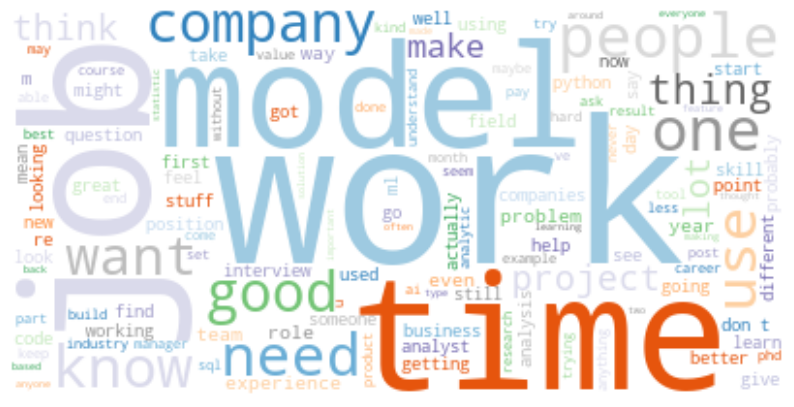

In [27]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(final_df['clean_text'].dropna())

 # words that are likely to dominate the contents such as data scientists, data science, OP (original poster), DS (short forms)
custom_stopwords = {'science',
                    'scientist',
                    'scientists',
                    'data',
                    'op',
                    'ds',
                    's',
                    'really',
                    'will',
                    'many',
                    'much',
                    'something',
                    'everything',
                    'always',
                    'etc',
                    "dont"}

text_cloud = WordCloud(
    stopwords = STOPWORDS.union(custom_stopwords),
    colormap = 'tab20c',
    background_color = 'white',
    collocations = True).generate(text)

fig = plt.figure(figsize = (10,7))
plt.imshow(text_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Observations:

- The words 'model', 'job', 'people','interview' suggest that the subreddit memebers are actively discussing the practical aspects of data science such as employment.

- It is interesting that some words are listed as the most frequent words. This needs further investigation to understand the context. For example, the word 'time' can have diverse meanings as it could refer to technical terms such as time series analysis or 'time' in general.The same goes for the word 'mean' - it could also refer to the average 'mean'.

- There are also some words that don't carry much meaning for our analysis - we can include them in stopwords (for e.g. 'etc', 'now', 'will','really')

In [28]:
#Sanity check to understand the context in which certain words were used 
from pprint import pprint

print("time:\n")
pprint(list(final_df[final_df['clean_text'].str.contains(r'\btime\b')].clean_text)[:10], width=300)

print("one:\n")
pprint(list(final_df[final_df['clean_text'].str.contains(r'\bone\b')].clean_text)[:10], width=300)

print("bad:\n")
pprint(list(final_df[final_df['clean_text'].str.contains(r'\bbad\b')].clean_text)[:10], width=300)

time:

['general assembly is the worst bootcamp and waste of time and money',
 'company have no data so 80% of my role is creating synthetic data and its getting repetitive and plain waste of time, what to do?',
 'data science job is boring but i have so much free time. may i have some advice?',
 'i want to start learning about time series. how should i start?',
 'for the first time, i have seen a job post appreciating having coursera certificates.',
 'hate my job - waste of time?',
 "learning python and r at the same time - pros and cons, and do's and don'ts",
 'support vector machines dominate my prediction modeling nearly every time',
 "did i screw up my career or it's just a bad time to apply for jobs?",
 'getting a data science degree while working full time. am i just fucked?']
one:

['i applied to 250 jobs and timed how long each one took',
 'if you could ask the creators of pandas for one additional feature, what would it be?',
 'one trillion row challenge (1 trc)',
 "everyone 

## 3.Sentiment Analysis

In [29]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

final_df = (final_df.assign(
    length_text = final_df['clean_text'].str.len(),
    polarity_scores = final_df['clean_text'].apply(lambda x: round(sia.polarity_scores(x)['compound'],2))
    ).drop(['datetime','text'],axis = 1)
)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\janci\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
final_df.tail(2)

,id,flair,text_type,clean_text,length_text,polarity_scores
7767,1bpodhu,DE,comments,nice article! i've noticed this throughout my career in tech that whenever i'm tackling a new focus that requires new skills there are barely any available resources that cohesively describe processes and workflows from the ground up.,234,0.48
7768,1bpodhu,DE,comments,me too,6,0.00


In [31]:
#Examining correlation between length of text and the sentiment
final_df.corr(method = 'pearson', numeric_only = True)

,length_text,polarity_scores
length_text,1.000000,0.299683
polarity_scores,0.299683,1.000000


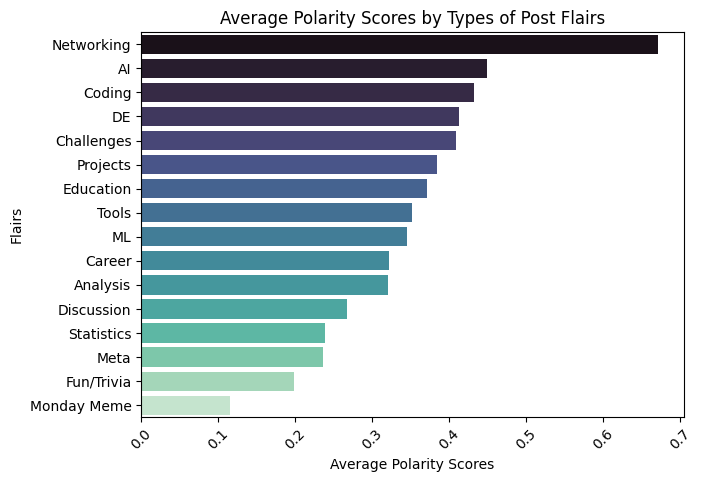

In [87]:
#Sentiment scores by flair types

polarity_scores_df = (final_df.groupby('flair')
                .agg({'polarity_scores':'mean'})
                .sort_values(by='polarity_scores',ascending=False)
                .reset_index())

palette = sns.color_palette("mako",len(polarity_scores_df['flair']))

fig = plt.figure (figsize =(7,5))
sns.barplot(data= polarity_scores_df,
           x = 'polarity_scores',
           y = 'flair',
           palette= palette)

#set labels and titles
plt.xlabel('Average Polarity Scores')
plt.ylabel('Flairs')
plt.title('Average Polarity Scores by Types of Post Flairs')
plt.xticks(rotation = 45)
plt.show()


In [33]:
def categorize_score(score):
    if score > 0.05:  
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

final_df['sentiment'] = final_df['polarity_scores'].apply(categorize_score)

In [34]:
#sanity check
print("Positive:\n")
pprint(list(final_df[final_df['sentiment']== 'positive'].clean_text)[:5], width=200)

print("Negative:\n")
pprint(list(final_df[final_df['sentiment'] == 'negative'].clean_text)[:5], width=200)

print("Neutral:\n")
pprint(list(final_df[final_df['sentiment'] == 'neutral'].clean_text)[:5], width=200)

Positive:

['it be like this now',
 'what opinion about data science would you defend like this?',
 'my greatest data science achievement...',
 'simply, wow',
 "ever disassociate during job interviews because you feel like everything the company, and what you'll be doing, is just quickening the return to the feudal age?"]
Negative:

["friendly reminder not to work too hard. you'll just get fired",
 'llms hype has killed data science',
 'a data scientist got caught lying about their project work and past experience during interview today',
 "anyone else been mildly horrified once they dive into the company's data?",
 'a small rant - the quality of data analysts / scientists']
Neutral:

['meme mondays', 'data scientist quits her job at spotify', 'xkcd comic does machine learning', 'i investigated the underground economy of glassdoor reviews', 'the bs they tell about data science…']


In [35]:
#titles breakdown by sentiment categories
sentiment_df = (pd.DataFrame(
    final_df.value_counts('sentiment')
    .reset_index()
))
print(sentiment_df)

  sentiment  count
0  positive   4530
1   neutral   1757
2  negative   1375


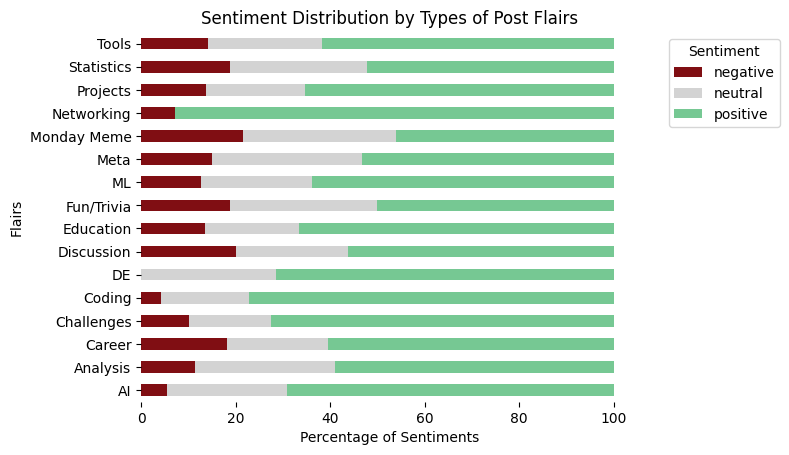

In [86]:
# Prepare the data for plotting
pivot_df = final_df.groupby(['flair', 'sentiment']).size().unstack(fill_value=0)
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.div(pivot_df['total'], axis=0) * 100  # Convert counts to percentages
pivot_df.drop('total', axis=1, inplace=True)

# Plotting
ax = pivot_df.plot(kind='barh', stacked=True, color= ['#800E13','#D3D3D3','#76C893'])
ax.set_xlabel('Percentage of Sentiments')
ax.set_ylabel('Flairs')
ax.set_title('Sentiment Distribution by Types of Post Flairs')

ax.set_frame_on(False)
# Move the legend
ax.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Topic Modelling

For topic modelling, since our interest is in extracting most common topics, we need to process the text again by removing more general words that are common in social media such as 'going, going to, look, stuff,prolly, probably, thing, maybe'. 

For example,
- The word 'one' is one of the top words in the documents.But it was mostly used as a phrase such as 'one of the' or as a digit 'one'. This does not provide information into the topics we are interested in. 
- The word 'like' was used in a variety of contexts to express preference as well as to use as a filler word.

In [37]:
#Import the vectorizer

from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ  # Adjective
    elif nltk_pos.startswith('V'):
        return wordnet.VERB  # Verb
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN  # Noun
    elif nltk_pos.startswith('R'):
        return wordnet.ADV   # Adverb
    else:
        return None 

lemmatizer = WordNetLemmatizer()

#Adding generic words and non-relevant words to the stopwords list 
#based on wordcloud and results from manually scanning the contents

new_stopwords = {'back','go','like','get','take','feel','see','also','will','would','lot','stuff','maybe','even',
                'actually','probably','may','sure','post','around','one','still','someone','thing','analyst','might','want',
                'well','two','pretty','anything','something','already','never','able','ago','bit','cause','cuz','basically',
                'yes','no','never','almost','anyone'} 
custom_stopwords.update(new_stopwords)
stop_words = set(stopwords.words('english'))
stop_words.update(custom_stopwords)

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Filter out non-alphabetic tokens
    pos_tags = nltk.pos_tag(tokens)  # Part-of-speech tagging
    lemmatized = []
    for word, pos_tag in pos_tags:
        wordnet_pos = get_wordnet_pos(pos_tag)
        if wordnet_pos is not None:
            lemma = lemmatizer.lemmatize(word, wordnet_pos)
            lemmatized.append(lemma)

    # Replace 'analysis' with 'analytics' after lemmatization
    lemmatized = ['analytics' if word == 'analysis' else word for word in lemmatized]

    lemmatized = [word for word in lemmatized if word not in stop_words]  # Remove stopwords
    return ' '.join(lemmatized)

tokenized = final_df['clean_text'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\janci\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\janci\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

#we will test with both bigrams and trigrams as a lot of phrases were used in the comments
vect = TfidfVectorizer(max_features = 100, ngram_range = (1,2), min_df = 5, max_df = 0.5).fit(tokenized)

X_text = vect.fit_transform(tokenized)

#changing sparse matrix into dataframe to be more readable
X_df = pd.DataFrame(X_text.toarray(), columns = vect.get_feature_names_out())

In [39]:
X_df.head()

,ai,analytics,answer,apply,ask,bad,best,big,build,business,...,tool,try,understand,use,value,way,week,work,write,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.502075,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


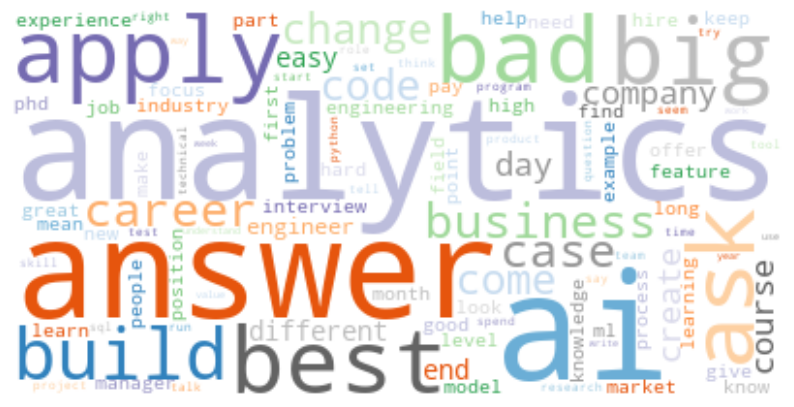

In [77]:
string = ' '.join(X_df.columns)

text_cloud = WordCloud(
    stopwords = STOPWORDS.union(custom_stopwords),
    colormap = 'tab20c',
    background_color = 'white',
    collocations = True).generate(string)

fig = plt.figure(figsize = (10,7))
plt.imshow(text_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [72]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, 
                                      random_state=42,
                                      learning_method = 'online')

#to fit the LDA model, we have to use the sparse matrix
lda_model.fit(X_text)

lda_output = lda_model.fit_transform(X_text)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=5,
                          random_state=42)


In [42]:
#Examining model performance before tuning

print("Log Likelihood: ", lda_model.score(X_text))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(X_text))

Log Likelihood:  -79871.74798384524
Perplexity:  196.8330452679066


In [43]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

tf_feature_names = vect.get_feature_names_out()
display_topics(lda_model, tf_feature_names, no_top_words=10)

Topic 0:
job project role question interview great understand apply position try
Topic 1:
problem model first mean say come analytics year new example
Topic 2:
make look good think python need skill build company know
Topic 3:
learn time start give help pay best day point way
Topic 4:
use people work model ask business code ml know find


The topics have some meaningful words and are interpretable to an extent. However, there is still room for improvement as some topics seem to be overlapped. For example, both topic 0 and topic 1 seem to be discussing technical aspects of data science like python, sql and coding. Topic 6 and Topic 7 are hard to interpret. We can experiment with fewer number of topics in tuning.

### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

search_params = {
  'n_components': [5, 8, 10, 15, 20], # Number of topics
  'learning_decay': [.5, .7, .9],  # Learning decay
  'learning_offset': [10, 50, 100],  # Learning offset
  'max_iter': [10, 50, 100]  # Max learning iterations
}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
rs_model = RandomizedSearchCV(lda, param_distributions=search_params, n_iter=10)

# Do the Random Search
rs_model.fit(X_text)

# Best Model
best_lda_model = rs_model.best_estimator_


In [45]:
# Model Parameters
print("Best Model's Params: ", rs_model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", rs_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X_text))

Best Model's Params:  {'n_components': 5, 'max_iter': 50, 'learning_offset': 10, 'learning_decay': 0.9}
Best Log Likelihood Score:  -16433.935313008733
Model Perplexity:  177.15667703606206


In [46]:
#Tuned hyperparameters
#Best Model's Params:  {'n_components': 5, 'max_iter': 50, 'learning_offset': 10, 'learning_decay': 0.9}

In [59]:
tuned_lda_model = LatentDirichletAllocation(n_components=5, 
                                            random_state= 42,
                                            learning_offset = 10,
                                            learning_decay = 0.9,
                                            learning_method = 'online',
                                            max_iter = 50)

tuned_lda_model.fit(X_text)

LatentDirichletAllocation(learning_decay=0.9, learning_method='online',
                          learning_offset=10, max_iter=50, n_components=5,
                          random_state=42)

In [57]:
#Examining model performance after tuning

print("Log Likelihood: ", tuned_lda_model.score(X_text))

# Lower the better
print("Perplexity: ", tuned_lda_model.perplexity(X_text))

Log Likelihood:  -79794.06257562421
Perplexity:  195.82435748904905


As Log Likelihood decreases, the model fit a dataset better. Let's see the new topics.

In [63]:
tf_feature_names = vect.get_feature_names_out()
display_topics(tuned_lda_model, tf_feature_names, no_top_words=13)

Topic 0:
job project role interview great question apply ask year position experience change try
Topic 1:
problem model first analytics come ai hard new team product tell example research
Topic 2:
look good make python skill need think know big job level field sql
Topic 3:
time learn start give help pay company work day best career point course
Topic 4:
use work people model business code ml know mean test engineering need write


The key words seem like the possible discussions that could occur in data science community. Generally, based on these key words, we can roughly interpret the topics as followings:

Topic 0 - Job Seeking and Career Progression (key words - apply for jobs, roles, experience, interview, change job )

Topic 1: Problem-Solving and Research in Data Science

Topic 2: Skills and Tools

Topic 3: Learning and Career Development

Topic 4: Practical Application and Collboration


In [ ]:
import pyLDAvis
import pyLDAvis.lda_model

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.lda_model.prepare(tuned_lda_model, X_text, vect, mds ='tsne')

LDAvis_prepared

It is good that the clusters are well-separated and distinct. It is an indication that the model could distinguish the topics. According to the size of the bubbles, the topic around Practical Application and Collboration is the most discussed topic in the subreddit.